In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1. Variance of normal RV-s

Create a large sample (>= 1000) of standard random numbers.  Compute
the sample variance using both of the formulas, and by the np.var method.

In [ ]:
n = 1000
x = np.random.normal(size=(n))
barx = x.mean()
print("mean:", barx)
vx = np.mean((x - x.mean())**2)
print("variance:", vx)
vx2 = np.mean(x*x) - np.mean(x)**2
print("variance 2:", vx2)
vx3 = x.var()
print("variance 3:", vx3)
sdx = np.sqrt(vx3)
print("st.dev:", sdx)

Compute the confidence intervals: $[mean - 1.96*std, mean +
                                    1.96*std]$.  Given the confidence
intervals, find which percentage of the sample falls outside of the interval.

In [15]:
x1 = barx - 1.96*sdx
x2 = barx + 1.96*sdx
outside = np.logical_or(x < x1, x > x2)
print("outside pct:", outside.mean())

mean: 0.04383193920400232
variance: 0.9348178757589758
variance 2: 0.9348178757589758
variance 3: 0.9348178757589758
st.dev: 0.9668598015012185
outside pct: 0.043


All results are exactly the same, i.e. numpy uses a similar formula
for the variance.  Also, the results are terribly close to 1, which is
not surprising as we picked the standard normals.

## 2. Variance of means

Do a similar exercise, just instead of random numbers, pick means of a
random sample (of size $n$ = 1, 3, 10, 30, ..., 1000, ... as far as your
               computer can go).
* How big is the variance of these means?
* what is the confidence interval?
* what percentage of observations fall outside of the interval?
* how does all that depend on the sample size $n$?

In [24]:
n = 1
m = 1000
mu = np.random.normal(size=(m,n)).mean(axis=1)
print("var(mu):", mu.var())
barx = mu.mean()
std = np.sqrt(mu.var())
x1 = barx - 1.96*std
x2 = barx + 1.96*std
print("confidence interval:", x1, x2)
inside = np.logical_and(mu >= x1, mu <= x2)
print("inside pct:", inside.mean())


var(mu): 0.9738235448158653
confidence interval: -1.9933903474345376 1.8749635814425127
inside pct: 0.961


Now write it as a function

In [68]:
def meansamples(m, n):
    mu = np.random.normal(size=(m,n)).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    return (x1, x2, inside)
meansamples(1000,1000)    

0.946


(-0.06062003197324117, 0.05929459568904924, 0.946)

0.952
0.952
0.943
0.943
0.945
0.945
0.961
0.961
0.951
0.951
0.948
0.948
0.949
0.949
0.947
0.947
           lower    pct     upper
1.0     1.986017  0.947  1.986017
3.0     1.105443  0.947  1.105443
10.0    0.617304  0.947  0.617304
30.0    0.360141  0.947  0.360141
100.0   0.183491  0.947  0.183491
300.0   0.116656  0.947  0.116656
1000.0  0.062940  0.947  0.062940
3000.0  0.036632  0.947  0.036632


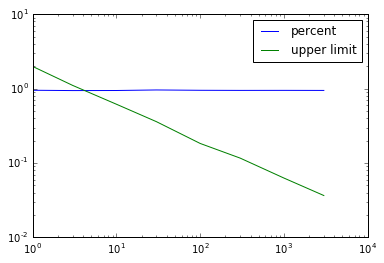

In [70]:
ns = np.array([1, 3, 10, 30, 100, 300, 1000, 3000], dtype="float")
pcts = np.empty_like(ns)
lowers = np.empty_like(ns)
uppers = np.empty_like(ns)
for i, n in enumerate(ns):
    l, u, pct = meansamples(m, int(n))
    pcts[i] = pct
    lowers[i] = u
    uppers[i] = u

data = pd.DataFrame({"lower": lowers, "upper": uppers, "pct": pcts},
                    index=ns)
print(data)
plt.loglog(ns, pcts, label='percent')
plt.loglog(ns, uppers, label='upper limit')
plt.legend()

Comment: pct is the same, interval falls rapidly.

## 3. extra task

In [60]:
def meansamples2(m, n):
    mu = np.random.normal(size=(m,n)).cumsum(axis=1).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    print(x1, x2)
    return (x1, x2, inside)


-1.9804200809256283 1.9291509935777487
-2.471888643491688 2.4187666727983097
-3.8594481275404484 3.802694736910721
-6.441749566286533 6.283173578306662
-11.489500343815807 11.253965206075895
-19.712236795983113 19.901310462967967
-34.919704670248734 35.96059951230335


-63.57180809921198 63.18713304102474
            lower    pct      upper
1.0     -1.980420  0.944   1.929151
3.0     -2.471889  0.950   2.418767
10.0    -3.859448  0.947   3.802695
30.0    -6.441750  0.946   6.283174
100.0  -11.489500  0.960  11.253965
300.0  -19.712237  0.948  19.901310
1000.0 -34.919705  0.956  35.960600
3000.0 -63.571808  0.954  63.187133


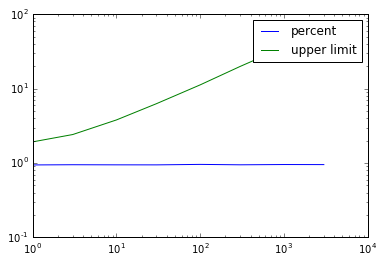

In [71]:
ns = np.array([1, 3, 10, 30, 100, 300, 1000, 3000], dtype="float")
pcts = np.empty_like(ns)
lowers = np.empty_like(ns)
uppers = np.empty_like(ns)
for i, n in enumerate(ns):
    l, u, pct = meansamples2(m, int(n))
    pcts[i] = pct
    lowers[i] = l
    uppers[i] = u

data = pd.DataFrame({"lower": lowers, "upper": uppers, "pct": pcts},
                    index=ns)
print(data)
plt.loglog(ns, pcts, label='percent')
plt.loglog(ns, uppers, label='upper limit')
plt.legend()

Now the upper limit is increasing...